# Project :- Use a decision tree classifier to decide whether the banknote is authenticate or fake

Use bagging classifier to improve the performance of the algorithm developed. Present the accuracy and classification report with a labelled Decision Tree

In [18]:
# Importing all the neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data
df = pd.read_csv("C:/Users/Vaibhav/Desktop/ml data set/banknotes_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Storing the feature names in a variable
feature = df.columns[:-1]
print("feature name",feature)

# Target categories 
target = df["Class"].unique().astype(str)
print("target name",target)

feature name Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')
target name ['0' '1']


In [6]:
# Data preprocessing :-
# dividing the Independent and dependent variable into "x" and "y" variable
# x--> Independent variable (Variance ,Skewness , Curtosis, Entropy)
# y --> Dependent variable (class)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
# Spliting the traing and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)


In [8]:
# Scale the traing and testing data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_test[0:5,:])

[[-0.77491408 -2.19276019  2.08404846  0.08591101]
 [ 1.67809087 -0.33505371 -0.24999944  1.09806281]
 [-0.86147317  0.30840173 -0.78433999 -1.29305867]
 [ 0.38336448  0.29801909  0.45355783  0.79915949]
 [ 1.73306086  0.23392356 -0.65069941  1.12275293]]


In [9]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Now it's time to select out best attribute for root node
# here we defined the decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 0, max_depth = 3) # max_depth --> no. of divison

# perform training 
# our data is already prepocessed that's why we don't did transform 
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [10]:
# Test our model with testing data and predict the values
y_pred = clf_entropy.predict(x_test)
print("predicted target")
print(y_pred)

predicted target
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0
 1 0 1 1 0]


In [11]:
# build a confusion matrix to know the accuracy of our y_pred and y_test(that we actually known)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("confusion matrix : \n", confusion_matrix(y_test,y_pred))

print("Accuracy : \n", accuracy_score(y_test,y_pred)*100,"%")

print("report : \n", classification_report(y_test,y_pred))

confusion matrix : 
 [[209  23]
 [  4 176]]
Accuracy : 
 93.44660194174757 %
report : 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       232
           1       0.88      0.98      0.93       180

    accuracy                           0.93       412
   macro avg       0.93      0.94      0.93       412
weighted avg       0.94      0.93      0.93       412



In [14]:
# predict on random values
x_rand = [[6.4,1.8,6.6,2]]
y_pred1 = clf_entropy.predict(x_rand)
print("predicted target",y_pred1)

predicted target [0]


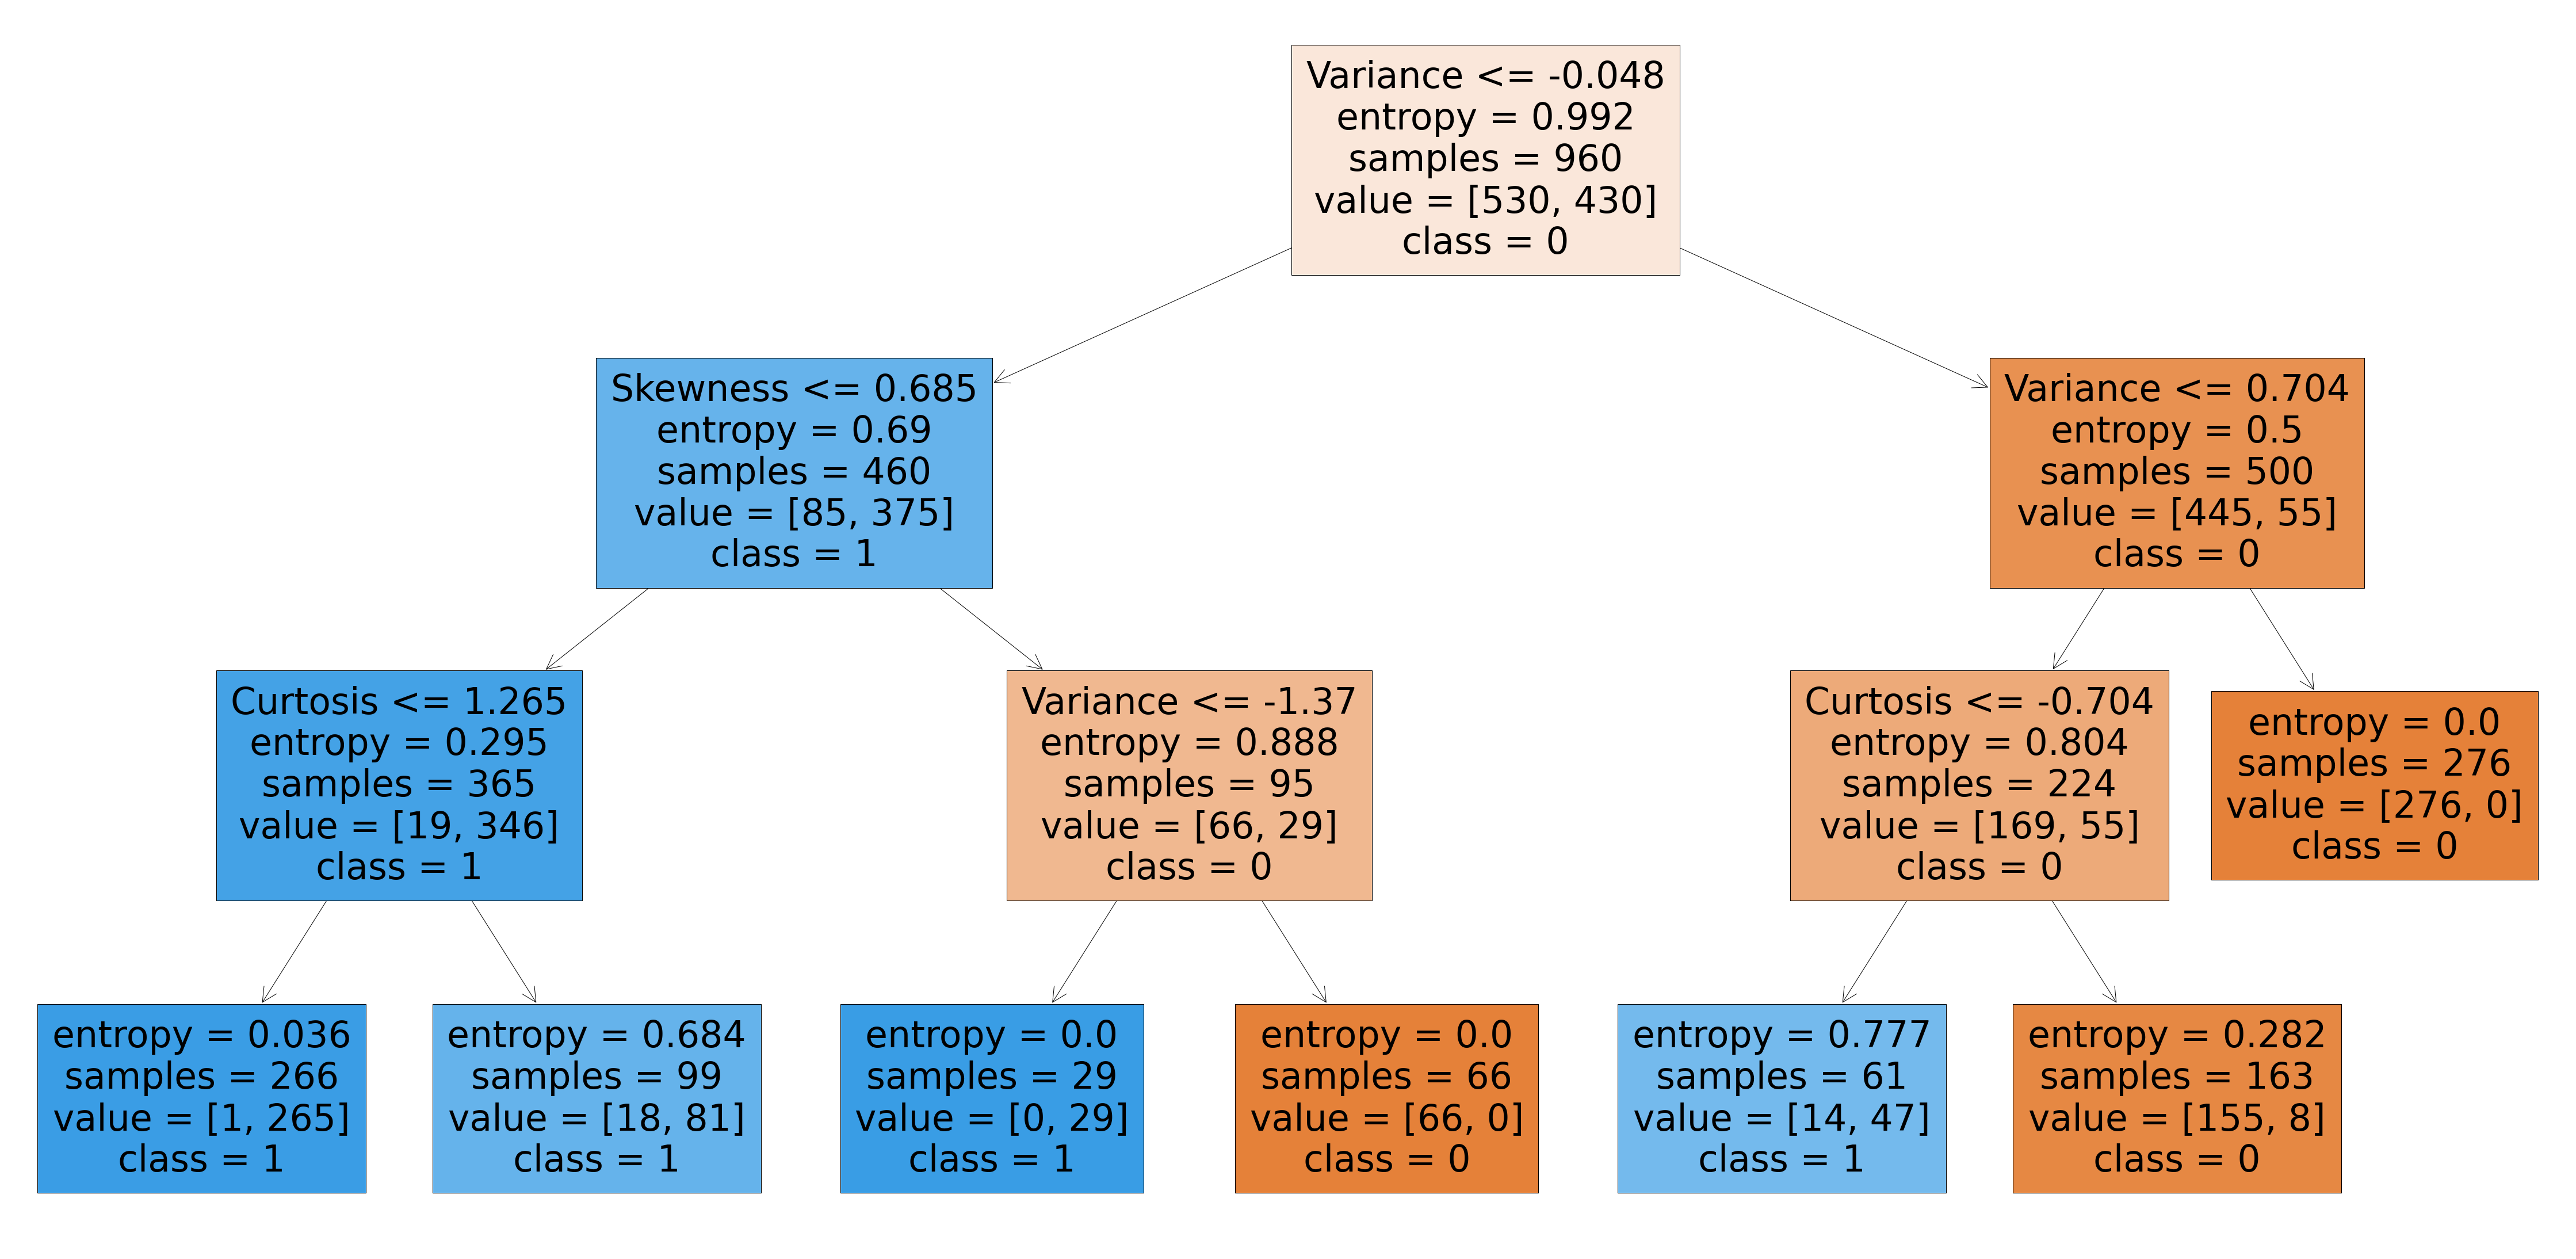

In [18]:
# Let's plot our decision tree
from sklearn import tree
fig = plt.figure(figsize = (80,40))
a = tree.plot_tree(clf_entropy,feature_names = feature,class_names = target,filled = True)

In [15]:
# bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(random_state = 5)

#fitting the model
tree = tree.fit(x_train,y_train)

# A bagging parameters
# 1. base_estimator object, default = None
# the base estimator to fit on random subsets of the datasets. if None, then the as is a decisiontreeclassifier
# 2. n_estimate int, default = 10
# 3. Random_state

bag = BaggingClassifier(base_estimator = tree , n_estimators = 500 , random_state = 5)
bag = bag.fit(x_train,y_train)

# predicting the test set
y_pred2 = bag.predict(x_test)
# Most important code 
# base_estimater = which algo you want to 

In [17]:
# test the accuracy of model after bagging
bag_test = round(accuracy_score(y_test,y_pred2),2)*100
print("Accuracy of bagging after test",bag_test)

Accuracy of bagging after test 99.0
